# **데이터 전처리**

In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!sudo make install
%cd ..

--2023-11-08 03:14:53--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-11-08 03:14:54--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://jaist.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-11-08 03:14:54--  http://jaist.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving jaist.dl.sourceforg

In [2]:
!pip install TA-Lib

  Using cached TA-Lib-0.4.28.tar.gz (357 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=TA_Lib-0.4.28-cp310-cp310-linux_x86_64.whl size=464560 sha256=edd153f6e9462a0da1ec93fa4078de77bca9cf1bcc6789217c2ba4f590251312
  Stored in directory: /home/ec2-user/.cache/pip/wheels/66/54/9d/10bfd00931c0c993f373269d350635df520b5064e5290a9d94
Successfully built TA-Lib


In [3]:
!pip install backtrader

In [4]:
!pip install pygad

In [5]:
%cd ~/SageMaker/Capstone/trending

/home/ec2-user/SageMaker/Capstone/trending


In [6]:
import talib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


from FNC_02_Preprocessing import FNC_02_Preprocessing
from FNC_Func_Extrema import FNC_Func_Extrema
from FNC_Func_PST import FNC_Func_PST

import matplotlib.pyplot as plt

In [7]:
%cd ~/SageMaker/Capstone/KR_Data/Data

/home/ec2-user/SageMaker/Capstone/KR_Data/Data


In [8]:
import os
a = os.listdir()
a

['KR737550K011.csv',
 'KR7207760000.csv',
 'KR7208710004.csv',
 'KR7036420008.csv',
 'KR7250000007.csv',
 'KR7214390007.csv',
 'KR7334890001.csv',
 'KR7002380004.csv',
 'KR7029960002.csv',
 'KR7038010005.csv',
 'KR7160600003.csv',
 'KR7192080000.csv',
 'KR7104540000.csv',
 'KR7059090001.csv',
 'KR7010951002.csv',
 'KR7003010006.csv',
 'KR7034950006.csv',
 'KR7142280007.csv',
 'KR7002350007.csv',
 'KR7033230004.csv',
 'KR7015590003.csv',
 'KR7059100008.csv',
 'KR7058400003.csv',
 'KR7073110009.csv',
 'KR7038070009.csv',
 'KR7010950004.csv',
 'KR7011150000.csv',
 'KR7000430009.csv',
 'KR7038680005.csv',
 'KR7013990007.csv',
 'KR7100790005.csv',
 'KR7065680001.csv',
 'KR7018310003.csv',
 'KR8344390008.csv',
 'KR7215100009.csv',
 'KR7244880001.csv',
 'KR7053110003.csv',
 'KR7012330007.csv',
 'KR7302920004.csv',
 'KR7091340000.csv',
 'KR7058970005.csv',
 'KR7052790003.csv',
 'KR7014830004.csv',
 'KR7114570005.csv',
 'KR7144510005.csv',
 'KR7101000008.csv',
 'KR7330350000.csv',
 'KR708997000

In [9]:
a= ['KR7003460003.csv']

In [10]:
def bt_data(data_bt):
    check_dtype = data_bt.dtype == 'object'
    if (check_dtype):
        return data_bt.str.replace(',','').astype('float')
    else :
        return data_bt.astype('float')

In [11]:
import pygad
import backtrader
import pandas as pd
import talib

class Trading:
    def __init__(self, df):
        self.df = df.copy()
        self.initial_capital = 100000.0

    def rsi(self,ga_instance, solution, solution_idx ):
        period, rsi_low, rsi_high = solution
        self.df['rsi'] = talib.RSI(self.df['Marketcap'], timeperiod=int(period))
        self.df['signal'] = np.where(self.df['rsi'] < rsi_low, 1, np.where(self.df['rsi'] > rsi_high, -1, 0))
        return self.trade_logic()

    def sma_cross(self,ga_instance, solution, solution_idx):
        pfast, pslow = solution
        self.df['sma1'] = talib.SMA(self.df['Marketcap'], timeperiod=int(pfast))
        self.df['sma2'] = talib.SMA(self.df['Marketcap'], timeperiod=int(pslow))
        self.df['signal'] = np.where(self.df['sma1'] > self.df['sma2'], 1, -1)
        return self.trade_logic()

    def ema_cross(self, ga_instance, solution, solution_idx):
        pfast, pslow=solution
        self.df['ema1'] = talib.EMA(self.df['Marketcap'], timeperiod=int(pfast))
        self.df['ema2'] = talib.EMA(self.df['Marketcap'], timeperiod=int(pslow))
        self.df['signal'] = np.where(self.df['ema1'] > self.df['ema2'], 1, -1)
        return self.trade_logic()

    def roc(self,ga_instance, solution, solution_idx):
        period = solution
        self.df['roc'] = talib.ROC(self.df['Marketcap'], timeperiod=int(period))
        self.df['signal'] = np.where(self.df['roc'] > 0, 1, -1)
        return self.trade_logic()

    def stochastic(self,ga_instance, solution, solution_idx):
        period, d_period, overbought, oversold = solution

        k, d = talib.STOCH(self.df['High']*self.df['Marketcap']/self.df['Close'], self.df['Low']*self.df['Marketcap']/self.df['Close'], self.df['Marketcap'], fastk_period=int(period), slowk_period=int(d_period))
        self.df['signal'] = np.where(k < oversold, 1, np.where(k > overbought, -1, 0))
        return self.trade_logic()

    def trade_logic(self):
        shares = 0
        for i in range(1, len(self.df)):
            if self.df['signal'].iloc[i] == 1 and self.initial_capital > 0:
                if self.df['Marketcap'].iloc[i] <= self.initial_capital:
                    shares = self.initial_capital / self.df['Marketcap'].iloc[i]
                    self.initial_capital =0.0
            elif self.df['signal'].iloc[i] == -1 and shares > 0:
                self.initial_capital += shares * self.df['Marketcap'].iloc[i]
                shares = 0.0

        final_portfolio_value = self.initial_capital + shares * self.df['Marketcap'].iloc[-1]
        return_rate = (final_portfolio_value - self.initial_capital) / self.initial_capital

        return final_portfolio_value

In [12]:
import talib
import numpy as np

class SHOW_SIGNAL:
    def __init__(self, df):
        self.df = df.copy()

    def rsi(self, period, rsi_low, rsi_high):
        self.df['rsi'] = talib.RSI(self.df['Marketcap'], timeperiod=int(period))
        self.df['signal'] = np.where(self.df['rsi'] < rsi_low, 1, np.where(self.df['rsi'] > rsi_high, -1, 0))
        return self.trade_logic()

    def sma_cross(self, pfast, pslow):
        self.df['sma1'] = talib.SMA(self.df['Marketcap'], timeperiod=int(pfast))
        self.df['sma2'] = talib.SMA(self.df['Marketcap'], timeperiod=int(pslow))
        self.df['signal'] = np.where(self.df['sma1'] > self.df['sma2'], 1, -1)
        return self.trade_logic()

    def ema_cross(self, pfast, pslow):
        self.df['ema1'] = talib.EMA(self.df['Marketcap'], timeperiod=int(pfast))
        self.df['ema2'] = talib.EMA(self.df['Marketcap'], timeperiod=int(pslow))
        self.df['signal'] = np.where(self.df['ema1'] > self.df['ema2'], 1, -1)
        return self.trade_logic()

    def roc(self, period):
        self.df['roc'] = talib.ROC(self.df['Marketcap'], timeperiod=int(period))
        self.df['signal'] = np.where(self.df['roc'] > 0, 1, -1)
        return self.trade_logic()

    def stochastic(self, period, d_period, overbought, oversold):
        k, d = talib.STOCH(self.df['High']*self.df['Marketcap']/self.df['Close'], self.df['Low']*self.df['Marketcap']/self.df['Close'], self.df['Marketcap'], fastk_period=int(period), slowk_period=int(d_period))
        self.df['signal'] = np.where(k < oversold, 1, np.where(k > overbought, -1, 0))
        return self.trade_logic()

    def trade_logic(self, initial_capital=100000.0):
        shares = 0
        for i in range(1, len(self.df)):
            if self.df['signal'].iloc[i] == 1 and initial_capital > 0:
                if self.df['Marketcap'].iloc[i] <= initial_capital:
                    shares = initial_capital / self.df['Marketcap'].iloc[i]
                    initial_capital =0.0
            elif self.df['signal'].iloc[i] == -1 and shares > 0:
                initial_capital += shares * self.df['Marketcap'].iloc[i]
                shares = 0.0

        final_portfolio_value = initial_capital + shares * self.df['Marketcap'].iloc[-1]
        return_rate = (final_portfolio_value - initial_capital) / initial_capital

        return final_portfolio_value

In [13]:
def callback_generation(ga_instance):
    # 최대 적합도 값 가져오기
    max_fitness = ga_instance.best_solution()[1]
    if max_fitness/100000.0 > df_bt['Marketcap'][-1]/df_bt['Marketcap'][0]:
        ga_instance.stop_training = True

In [14]:
def genetic(g_space,Trading,n_gen):
    ga_instance_rsi = pygad.GA(
        num_generations=50,
        num_parents_mating=50,
        fitness_func=Trading,  # RSI 전략의 적합도 함수
        sol_per_pop=100,
        num_genes=n_gen,
        gene_space=g_space,
        parent_selection_type="rank",
        keep_parents=3,
        crossover_type="uniform",
         on_generation=callback_generation,
        mutation_type="random",
        mutation_percent_genes=5,
        mutation_num_genes=1
    )

    ga_instance_rsi.run()

    solution, solution_fitness, solution_idx = ga_instance_rsi.best_solution()
    return solution, solution_fitness

In [15]:
def get_signals(df):
    trading = Trading(df)

    strategies = {
        "rsi": {"period": 14, "rsi_low": 30, "rsi_high": 70},
        "sma_cross": {"pfast": 20, "pslow": 60},
        "ema_cross": {"pfast": 20, "pslow": 60},
        "roc": {"period": 10},
        "stochastic": {"period": 14, "d_period": 3, "overbought": 70, "oversold": 30}
    }
    for i in ["rsi", "sma_cross", "roc", "ema_cross", "stochastic"]:

        if i == "rsi":
            g_space = [range(2, 100), range(1, 100), range(1, 100)]
            rsi_sol, rsi_fitness = genetic(g_space, trading.rsi, 3)
            strategies['rsi'] = {"period": rsi_sol[0], "rsi_low": rsi_sol[1], "rsi_high": rsi_sol[2]}

        elif i ==  "sma_cross":
            g_space = [range(2, 100), range(2, 100)]
            sma_sol, sma_fitness = genetic(g_space, trading.sma_cross, 2)
            strategies['sma_cross'] = {"pfast": sma_sol[0], "pslow": sma_sol[1]}

        elif i == "roc":
            g_space = [range(2, 100)]
            roc_sol, roc_fitness = genetic(g_space, trading.roc, 1)
            strategies['roc'] = {"period": roc_sol[0]}

        elif i == "ema_cross":
            g_space = [range(2, 100), range(2, 100)]
            ema_sol, ema_fitness = genetic(g_space, trading.ema_cross,2)
            strategies['ema_cross'] = {"pfast": ema_sol[0], "pslow": ema_sol[1]}

        elif i == "stochastic":
            g_space = [range(2, 100),range(2, 100), range(2, 100), range(2, 100)]
            sto_sol, sto_fitness = genetic(g_space, trading.stochastic,4)
            strategies["stochastic"] = {"period": sto_sol[0], "d_period": sto_sol[1], "overbought": sto_sol[2], "oversold": sto_sol[3]}

    signal_dataframes = pd.DataFrame()
    show_sig = SHOW_SIGNAL(df)
    for name, params in strategies.items():
        show_sig.df = df.copy()
        getattr(show_sig, name)(**params)
        signal_dataframes[name] = show_sig.df[['signal']].copy()

    return signal_dataframes

In [16]:
cnt = 0
total =0
results = {}
print(len(a))
for i in range(len(a)):
    dfdf = pd.read_csv(a[i])
    columns_to_check = ['TRD_DD', 'ISU_CD', 'ISU_NM', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC',
                    'TDD_LWPRC', 'MKTCAP', 'ACC_TRDVOL']


    if not all(col in dfdf.columns for col in columns_to_check):
        continue
    dfdf = dfdf[['TRD_DD', 'ISU_CD', 'ISU_NM', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC',
           'TDD_LWPRC', 'MKTCAP', 'ACC_TRDVOL']]
    for column in dfdf.columns:
        if dfdf[column].dtype == 'object' and column not in ['TRD_DD', 'ISU_NM']:
            try:
                dfdf[column] = dfdf[column].str.replace(',', '').astype('float')
            except ValueError as e:
                print(f" {column}: {e}")
        elif column not in ['TRD_DD', 'ISU_NM']:
            dfdf[column] = dfdf[column].astype('float')
    df =pd.concat([dfdf['TRD_DD'],dfdf['ISU_CD'],dfdf['ISU_NM'],dfdf['TDD_CLSPRC'],dfdf['TDD_OPNPRC'],dfdf['TDD_HGPRC'],dfdf['TDD_LWPRC'],dfdf['MKTCAP'],dfdf['ACC_TRDVOL']],axis=1)
    df = dfdf.sort_values(by=['TRD_DD'])
    df.reset_index(drop=True,inplace=True)

    #인풋 데이터 모양 맞춰주기(backtest에 들어갈 데이터 모양)
    df_bt = df[['TRD_DD','TDD_OPNPRC','TDD_HGPRC','TDD_LWPRC','TDD_CLSPRC', 'ACC_TRDVOL', 'MKTCAP']].copy()
    df_bt['TRD_DD'] = pd.to_datetime(df_bt['TRD_DD'])
    df_bt.rename(columns={'TRD_DD':'Date', 'TDD_OPNPRC':'Open', 'TDD_HGPRC':'High','TDD_LWPRC':'Low','TDD_CLSPRC':'Close', 'ACC_TRDVOL':'Volume', 'MKTCAP':'Marketcap'}, inplace=True)
    df_bt.set_index('Date',drop=True,inplace=True)
    df_bt['Open'] = bt_data(df_bt['Open'])
    df_bt['High'] = bt_data(df_bt['High'])
    df_bt['Low'] = bt_data(df_bt['Low'])
    df_bt['Close'] = bt_data(df_bt['Close'])
    df_bt['Volume'] = bt_data(df_bt['Volume'])
    df_bt['Marketcap'] = bt_data(df_bt['Marketcap'])

    signal_dataframes = get_signals(df_bt)

    data = pd.DataFrame()
    scaler = MinMaxScaler(feature_range=(0, 1))
    result = scaler.fit_transform(np.array(df_bt['Marketcap']).reshape(-1,1))
    data['A2'] = pd.DataFrame(result)

    # PST 파라매터 설정
    T=5  # time interval
    P=0.05  # percentage
    if data['A2'].size == 0 or len(data['A2']) <= 10:
        data['PST'] = []
        data['nPST'] = 0
    else:
        data['PST'], data['nPST'] = FNC_Func_PST(T, P, data['A2'])

    signal_dataframes = signal_dataframes.reset_index()
    signal_dataframes['Trend'] =data['PST']

    signal_dataframe = signal_dataframes.copy()
    df_bb = df_bt.reset_index(drop=True)
    rdf = df_bb['Close']

    signal_dataframes = pd.concat([signal_dataframe,rdf], axis=1)
    signal_dataframes = pd.concat([signal_dataframes, df_bb['Marketcap']],axis=1)
    signal_dataframes = signal_dataframes.rename(columns={'Close':'TDD_CLSPRC'})
    def backtest(df):
        initial_capital = 100000.0  # 초기 자본
        shares = 0  # 주식 보유량

        # 매 거래일의 포트폴리오 가치를 추적할 리스트
        portfolio_values = []

        for _, row in df.iterrows():
            if row['rsi'] == 1 and initial_capital > 0:
                shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
                initial_capital = 0.0 # 현금은 0이 됩니다.

            elif row['rsi'] == -1 and shares > 0:
                initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
                shares = 0.0  # 주식은 0이 됩니다.

            # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
            portfolio_value = initial_capital + shares * row['Marketcap']
            portfolio_values.append(portfolio_value)

        df['Portfolio_Value'] = portfolio_values
        return df

    sd = backtest(signal_dataframes)
    rsi_per = sd['Portfolio_Value'].iloc[-1]/sd['Portfolio_Value'][0]*100

    def backtest(df):
        initial_capital = 100000.0  # 초기 자본
        shares = 0  # 주식 보유량

        # 매 거래일의 포트폴리오 가치를 추적할 리스트
        portfolio_values = []

        for _, row in df.iterrows():
            if row['sma_cross'] ==1 and initial_capital > 0:
                shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
                initial_capital = 0.0  # 현금은 0이 됩니다.

            elif row['sma_cross'] == -1 and shares > 0:
                initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
                shares = 0.0  # 주식은 0이 됩니다.

            # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
            portfolio_value = initial_capital + shares * row['Marketcap']
            portfolio_values.append(portfolio_value)

        df['Portfolio_Value'] = portfolio_values
        return df

    sd = backtest(signal_dataframes)

    sma_per = sd['Portfolio_Value'].iloc[-1]/sd['Portfolio_Value'][0]*100

    def backtest(df):
        initial_capital = 100000.0  # 초기 자본
        shares = 0  # 주식 보유량

        # 매 거래일의 포트폴리오 가치를 추적할 리스트
        portfolio_values = []

        for _, row in df.iterrows():
            if row['ema_cross'] == 1 and initial_capital > 0:
                shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
                initial_capital = 0
            elif row['ema_cross'] == -1 and shares > 0:
                initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
                shares = 0.0  # 주식은 0이 됩니다.

            # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
            portfolio_value = initial_capital + shares * row['Marketcap']
            portfolio_values.append(portfolio_value)

        df['Portfolio_Value'] = portfolio_values
        return df

    sd = backtest(signal_dataframes)

    ema_per = sd['Portfolio_Value'].iloc[-1]/sd['Portfolio_Value'][0]*100

    def backtest(df):
        initial_capital = 100000.0  # 초기 자본
        shares = 0  # 주식 보유량

        # 매 거래일의 포트폴리오 가치를 추적할 리스트
        portfolio_values = []

        for _, row in df.iterrows():
            if row['roc'] == 1 and initial_capital > 0:
                shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
                initial_capital = 0

            elif row['roc'] == -1 and shares > 0:
                initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
                shares = 0.0  # 주식은 0이 됩니다.

            # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
            portfolio_value = initial_capital + shares * row['Marketcap']
            portfolio_values.append(portfolio_value)

        df['Portfolio_Value'] = portfolio_values
        return df

    sd = backtest(signal_dataframes)

    roc_per = sd['Portfolio_Value'].iloc[-1]/sd['Portfolio_Value'][0]*100

    def backtest(df):
        initial_capital = 100000.0  # 초기 자본
        shares = 0  # 주식 보유량

        # 매 거래일의 포트폴리오 가치를 추적할 리스트
        portfolio_values = []

        for _, row in df.iterrows():
            if row['stochastic'] == 1 and initial_capital > 0:
                shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
                initial_capital = 0

            elif row['stochastic'] == -1 and shares > 0:
                initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
                shares = 0.0  # 주식은 0이 됩니다.

            # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
            portfolio_value = initial_capital + shares * row['Marketcap']
            portfolio_values.append(portfolio_value)

        df['Portfolio_Value'] = portfolio_values
        return df

    sd = backtest(signal_dataframes)

    sto_per = sd['Portfolio_Value'].iloc[-1]/sd['Portfolio_Value'][0]*100

    origin_per = df_bt['Marketcap'][-1]/df_bt['Marketcap'][0]*100
    '''
    print(dfdf['ISU_NM'][0],"--   buy_and_hold : {:0.2f}%, rsi : {:0.2f}%, ema : {:0.2f}%, roc : {:0.2f}%, sto : {:0.2f}%, sma : {0.2f}%".format(origin_per, rsi_per, ema_per, roc_per, sto_per, sma_per),end ='\t')
    if origin_per<rsi_per or origin_per<ema_per or origin_per<roc_per or origin_per<sto_per or origin_per<sma_per:
        print("수익률 : {:0.2f}%".format(max(rsi_per, ema_per, roc_per, sto_per,sma_per)/origin_per *100),end="")
       cnt += 1
    isu_name = dfdf['ISU_NM'][0]

    # 결과 저장
    results[isu_name] = {
        "buy_and_hold": origin_per,
        "rsi": rsi_per,
        "ema": ema_per,
        "roc": roc_per,
        "sto": sto_per,
        "수익률":max(rsi_per, ema_per, roc_per, sto_per)/origin_per *100
    }
    total+=1
    print("\n")
# 딕셔너리를 DataFrame으로 변환
df_results = pd.DataFrame.from_dict(results, orient='index')

# DataFrame을 CSV 파일로 저장
df_results.to_csv('results.csv')
'''

1


In [17]:
signal_dataframes

,Date,rsi,sma_cross,ema_cross,roc,stochastic,Trend,TDD_CLSPRC,Marketcap,Portfolio_Value
0,1995-05-02,0,-1,-1,-1,0,0.0,9900.0,1.081456e+11,100000.000000
1,1995-05-03,0,-1,-1,-1,0,0.0,9800.0,1.070532e+11,100000.000000
2,1995-05-04,0,-1,-1,-1,0,0.0,9900.0,1.081456e+11,100000.000000
3,1995-05-06,0,-1,-1,-1,0,0.0,9790.0,1.069440e+11,100000.000000
4,1995-05-08,0,-1,-1,-1,0,0.0,9810.0,1.071624e+11,100000.000000
...,...,...,...,...,...,...,...,...,...,...
6757,2022-01-05,0,-1,1,-1,-1,0.0,2685.0,1.522460e+11,64325.053034
6758,2022-01-06,0,-1,1,-1,-1,0.0,2645.0,1.499779e+11,64325.053034
6759,2022-01-07,0,-1,1,-1,-1,0.0,2640.0,1.496944e+11,64325.053034
6760,2022-01-10,0,-1,1,-1,-1,0.0,2635.0,1.494109e+11,64325.053034


<Axes: >

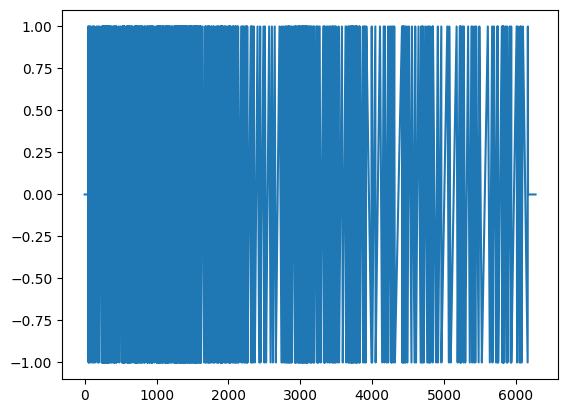

In [ ]:
import matplotlib.pyplot as plt
signal_dataframes["Trend"].plot()

In [22]:
cd ..

/home/ec2-user/SageMaker/Capstone


In [23]:
signal_dataframes.to_csv("signal_data.csv")

In [24]:
signal_dataframes = pd.read_csv("signal_data.csv").drop(columns=['Unnamed: 0'])
signal_dataframes

,Date,rsi,sma_cross,ema_cross,roc,stochastic,Trend,TDD_CLSPRC,Marketcap,Portfolio_Value
0,1995-05-02,0,-1,-1,-1,0,0.0,9900.0,1.081456e+11,100000.000000
1,1995-05-03,0,-1,-1,-1,0,0.0,9800.0,1.070532e+11,100000.000000
2,1995-05-04,0,-1,-1,-1,0,0.0,9900.0,1.081456e+11,100000.000000
3,1995-05-06,0,-1,-1,-1,0,0.0,9790.0,1.069440e+11,100000.000000
4,1995-05-08,0,-1,-1,-1,0,0.0,9810.0,1.071624e+11,100000.000000
...,...,...,...,...,...,...,...,...,...,...
6757,2022-01-05,0,-1,1,-1,-1,0.0,2685.0,1.522460e+11,64325.053034
6758,2022-01-06,0,-1,1,-1,-1,0.0,2645.0,1.499779e+11,64325.053034
6759,2022-01-07,0,-1,1,-1,-1,0.0,2640.0,1.496944e+11,64325.053034
6760,2022-01-10,0,-1,1,-1,-1,0.0,2635.0,1.494109e+11,64325.053034


In [25]:
X = signal_dataframes.iloc[:,1:6].values
Y = signal_dataframes['Trend'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

In [28]:
%cd ~/SageMaker/Capstone/ESN_Regressor/

/home/ec2-user/SageMaker/Capstone/ESN_Regressor


In [29]:
import os
os.listdir()

['ESN.py', '__pycache__', 'sparseLIB.py']

In [31]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/6d/13/b5e8bacd980b2195f8a1741ce11cbb9146568607795d5e4ff510dcff1064/torch-2.1.0-cp310-cp310-manylinux1_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 14.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 119.5 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for nvidia-cudnn-cu12==8.9.2.26 from https://files.pythonhosted.org/packages/ff/74/a2e2be7fb83aaedec84f391f082cf765dfb635e7caa9b49065f73e4835d8/nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 22.3 MB/s eta 0:00:0000:0100:01
 

In [32]:
from ESN import ESN
import torch

In [114]:
esn = ESN(resSize = 30000, spectral_radius = 0.7, sparsity = 0.005, output_dim =1, n_feature = 5, alpha=3e-5,lambda_leak = 0.9988 )

In [115]:
esn.fit(torch.tensor(X_train), torch.tensor(y_train).reshape(-1,1))

  0%|          | 0/4733 [00:00<?, ?it/s]

tensor([2.7857], device='cuda:0', grad_fn=<SubBackward0>)
tensor([4.3741], device='cuda:0', grad_fn=<SubBackward0>)
tensor([-2.8638], device='cuda:0', grad_fn=<SubBackward0>)
tensor([16.5002], device='cuda:0', grad_fn=<SubBackward0>)
tensor([16.3542], device='cuda:0', grad_fn=<SubBackward0>)
tensor([34.3979], device='cuda:0', grad_fn=<SubBackward0>)
tensor([33.8478], device='cuda:0', grad_fn=<SubBackward0>)
tensor([40.5644], device='cuda:0', grad_fn=<SubBackward0>)
tensor([17.3325], device='cuda:0', grad_fn=<SubBackward0>)
tensor([-2.1735], device='cuda:0', grad_fn=<SubBackward0>)
tensor([-21.5577], device='cuda:0', grad_fn=<SubBackward0>)
tensor([-16.1408], device='cuda:0', grad_fn=<SubBackward0>)
tensor([-8.7572], device='cuda:0', grad_fn=<SubBackward0>)
tensor([-1.0297], device='cuda:0', grad_fn=<SubBackward0>)
tensor([-9.3355], device='cuda:0', grad_fn=<SubBackward0>)
tensor([-14.7072], device='cuda:0', grad_fn=<SubBackward0>)
tensor([-14.2086], device='cuda:0', grad_fn=<SubBackwar

In [116]:
y_pred = esn.predict(torch.tensor(X_test))
y_pred

  0%|          | 0/2029 [00:00<?, ?it/s]

tensor([[0.0014],
        [0.0059],
        [0.0060],
        ...,
        [0.0354],
        [0.1620],
        [0.1946]], grad_fn=<CopySlices>)

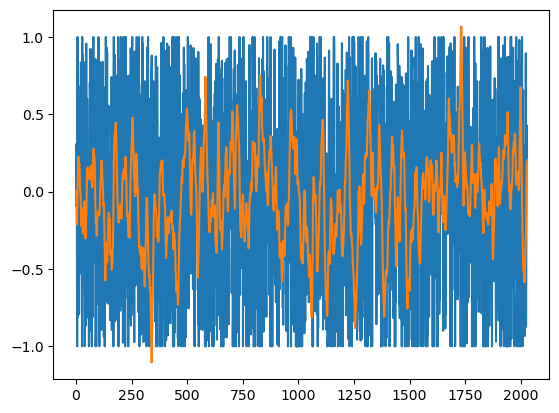

In [126]:
plt.plot(y_test)
plt.plot((y_pred).detach().numpy())
plt.show()

In [118]:
%cd ~/SageMaker/Capstone/KR_Data/Data

/home/ec2-user/SageMaker/Capstone/KR_Data/Data


In [119]:
cnt = 0
total =0
results = {}

for i in range(1):
    dfdf = pd.read_csv(a[i])
    columns_to_check = ['TRD_DD', 'ISU_CD', 'ISU_NM', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC',
                    'TDD_LWPRC', 'MKTCAP', 'ACC_TRDVOL']


    if not all(col in dfdf.columns for col in columns_to_check):
        continue
    dfdf = dfdf[['TRD_DD', 'ISU_CD', 'ISU_NM', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC',
           'TDD_LWPRC', 'MKTCAP', 'ACC_TRDVOL']]
    for column in dfdf.columns:
        if dfdf[column].dtype == 'object' and column not in ['TRD_DD', 'ISU_NM']:
            try:
                dfdf[column] = dfdf[column].str.replace(',', '').astype('float')
            except ValueError as e:
                print(f" {column}: {e}")
        elif column not in ['TRD_DD', 'ISU_NM']:
            dfdf[column] = dfdf[column].astype('float')
    df =pd.concat([dfdf['TRD_DD'],dfdf['ISU_CD'],dfdf['ISU_NM'],dfdf['TDD_CLSPRC'],dfdf['TDD_OPNPRC'],dfdf['TDD_HGPRC'],dfdf['TDD_LWPRC'],dfdf['MKTCAP'],dfdf['ACC_TRDVOL']],axis=1)
    df = dfdf.sort_values(by=['TRD_DD'])
    df.reset_index(drop=True,inplace=True)

    #인풋 데이터 모양 맞춰주기(backtest에 들어갈 데이터 모양)
    df_bt = df[['TRD_DD','TDD_OPNPRC','TDD_HGPRC','TDD_LWPRC','TDD_CLSPRC', 'ACC_TRDVOL', 'MKTCAP']].copy()
    df_bt['TRD_DD'] = pd.to_datetime(df_bt['TRD_DD'])
    df_bt.rename(columns={'TRD_DD':'Date', 'TDD_OPNPRC':'Open', 'TDD_HGPRC':'High','TDD_LWPRC':'Low','TDD_CLSPRC':'Close', 'ACC_TRDVOL':'Volume', 'MKTCAP':'Marketcap'}, inplace=True)
    df_bt.set_index('Date',drop=True,inplace=True)
    df_bt['Open'] = bt_data(df_bt['Open'])
    df_bt['High'] = bt_data(df_bt['High'])
    df_bt['Low'] = bt_data(df_bt['Low'])
    df_bt['Close'] = bt_data(df_bt['Close'])
    df_bt['Volume'] = bt_data(df_bt['Volume'])
    df_bt['Marketcap'] = bt_data(df_bt['Marketcap'])


In [120]:
df_bt = df_bt.reset_index()
df_bt["Marketcap"]

0       1.081456e+11
1       1.070532e+11
2       1.081456e+11
3       1.069440e+11
4       1.071624e+11
            ...     
6757    1.522460e+11
6758    1.499779e+11
6759    1.496944e+11
6760    1.494109e+11
6761    1.502614e+11
Name: Marketcap, Length: 6762, dtype: float64

In [121]:
df_bt = df_bt["Marketcap"].iloc[int(len(df_bt)*0.7):].reset_index().drop(columns=['index'])
df_bt

,Marketcap
0,1.343847e+11
1,1.343847e+11
2,1.343847e+11
3,1.343847e+11
4,1.343847e+11
...,...
2024,1.522460e+11
2025,1.499779e+11
2026,1.496944e+11
2027,1.494109e+11


In [145]:
def backtest(df):
    initial_capital = 100000.0  # 초기 자본
    shares = 0  # 주식 보유량

    # 매 거래일의 포트폴리오 가치를 추적할 리스트
    portfolio_values = []

    for _, row in df.iterrows():
        if row["pred_Trend"] >= 0.2 and initial_capital > 0:
            shares = initial_capital / row['Marketcap']  # 현재 자본으로 최대한 매수
            initial_capital = 0

        elif row["pred_Trend"] <= -0.4 and shares > 0:
            initial_capital = shares * row['Marketcap']  # 모든 주식을 판매하고 현금을 얻습니다.
            shares = 0.0  # 주식은 0이 됩니다.

        # 매 거래일의 포트폴리오 가치 계산 (현금 + 주식 가치)
        portfolio_value = initial_capital + shares * row['Marketcap']
        portfolio_values.append(portfolio_value)

    df['Portfolio_Value'] = portfolio_values
    return df

In [146]:
Tr = pd.DataFrame(y_pred.detach().numpy(),columns = ["pred_Trend"])
Tr = pd.concat([Tr,df_bt,pd.DataFrame(y_test,columns=["Trend"])],axis=1)
Tr

,pred_Trend,Marketcap,Trend
0,0.001410,1.343847e+11,-0.093023
1,0.005872,1.343847e+11,0.307692
2,0.006030,1.343847e+11,0.103448
3,-0.108075,1.343847e+11,0.238095
4,-0.210716,1.343847e+11,-0.250000
...,...,...,...
2024,-0.244138,1.522460e+11,-0.875000
2025,-0.129899,1.499779e+11,-0.476190
2026,0.035448,1.496944e+11,0.000000
2027,0.162040,1.494109e+11,0.428571


In [147]:
backtest(Tr)

,pred_Trend,Marketcap,Trend,Portfolio_Value
0,0.001410,1.343847e+11,-0.093023,100000.000000
1,0.005872,1.343847e+11,0.307692,100000.000000
2,0.006030,1.343847e+11,0.103448,100000.000000
3,-0.108075,1.343847e+11,0.238095,100000.000000
4,-0.210716,1.343847e+11,-0.250000,100000.000000
...,...,...,...,...
2024,-0.244138,1.522460e+11,-0.875000,184736.819029
2025,-0.129899,1.499779e+11,-0.476190,184736.819029
2026,0.035448,1.496944e+11,0.000000,184736.819029
2027,0.162040,1.494109e+11,0.428571,184736.819029


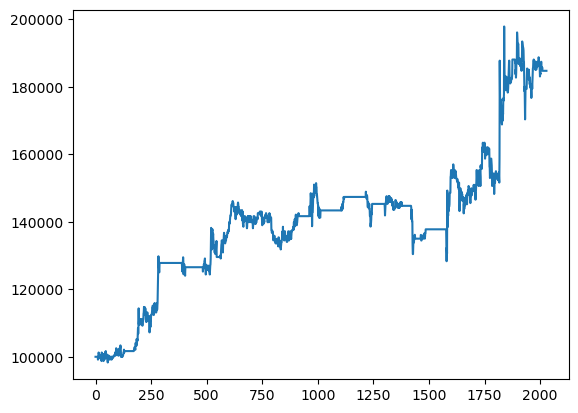

In [148]:
plt.plot(backtest(Tr)["Portfolio_Value"])

In [144]:
backtest(Tr)["Marketcap"][-1:]/backtest(Tr)["Marketcap"][0]

2028    1.118143
Name: Marketcap, dtype: float64